In [3]:
from obspy.clients.fdsn import Client
from obspy import read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
starttime = UTCDateTime('2023-05-29T04:57:33')
distance = 4.59
depth = 154

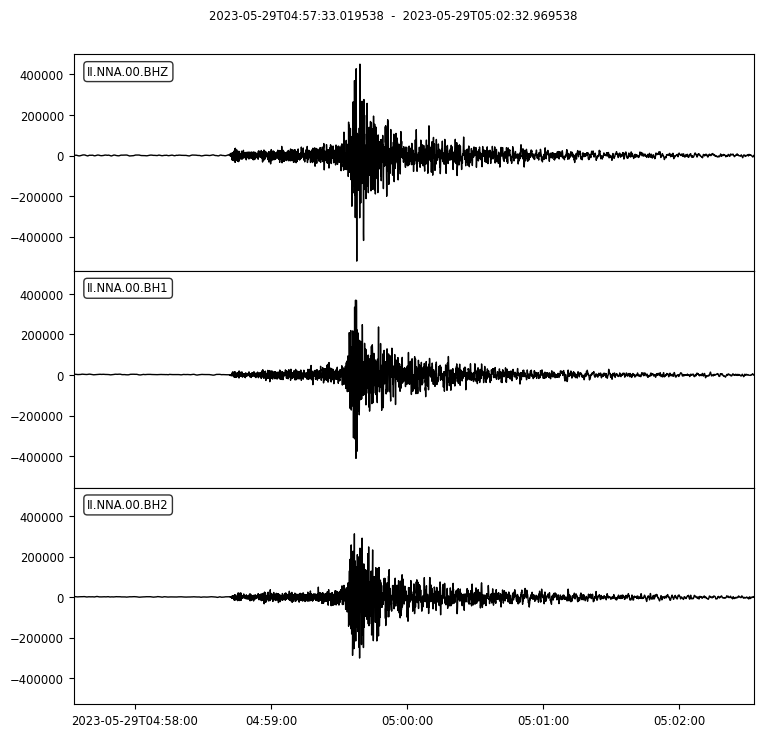

In [4]:
# Find an earthquake from Wilber3 - IRIS
client = Client('IRIS')

network = 'II'
station = 'NNA'
location = '00'
channel = 'BH*'

endtime = starttime + 5*60

stream = client.get_waveforms(network, station, location, channel, starttime, endtime, attach_response=True)
stream.plot();

In [5]:
# Save locally
filename = station + '_data'
stream.write(filename, format='mseed')

In [6]:
# Transform the earthquake
st = stream.copy()
st.detrend('linear')
st.taper(type='cosine', max_percentage=0.05)
pre_filt = (0.5, 0.6, 20, 25) # How do I know which frequencies to use?
st.remove_response(output='DISP', plot=False, pre_filt=pre_filt)

3 Trace(s) in Stream:
II.NNA.00.BH1 | 2023-05-29T04:57:33.019538Z - 2023-05-29T05:02:32.969538Z | 20.0 Hz, 6000 samples
II.NNA.00.BH2 | 2023-05-29T04:57:33.019538Z - 2023-05-29T05:02:32.969538Z | 20.0 Hz, 6000 samples
II.NNA.00.BHZ | 2023-05-29T04:57:33.019538Z - 2023-05-29T05:02:32.969538Z | 20.0 Hz, 6000 samples

Text(0.5, 0, 'Times (s)')

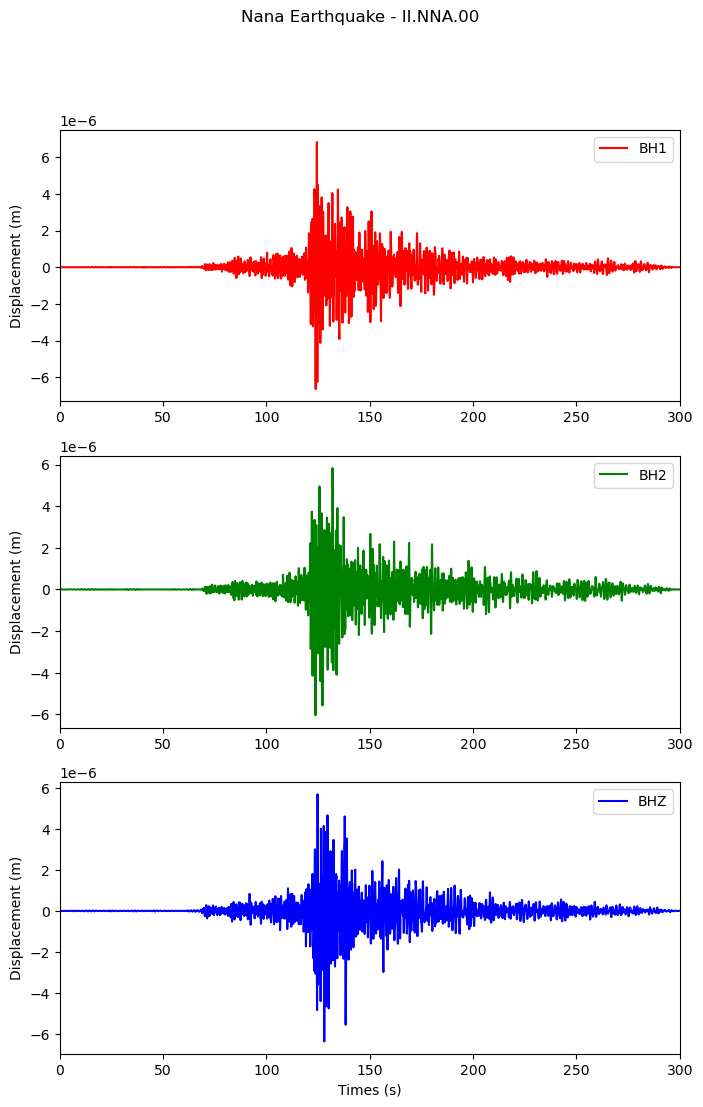

In [24]:
amps = [st[ind].data for ind in range(len(st))]
time = np.linspace(0,5*60,len(amps[0]))

fig = plt.figure(figsize=(8,12))
plt.suptitle('Nana Earthquake - '+network+'.'+station+'.'+location)

# Turn this into a for-loop
plt.subplot(3,1,1)
plt.plot(time, st[0].data, color='r', label='BH1')
plt.xlim(0,5*60)
plt.ylabel('Displacement (m)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(time, st[1].data, color='g', label='BH2')
plt.xlim(0,5*60)
plt.ylabel('Displacement (m)')
plt.legend()

plt.subplot(3,1,3)
plt.plot(time, st[2].data, color='b', label='BHZ')
plt.xlim(0,5*60)
plt.ylabel('Displacement (m)')
plt.legend()

plt.xlabel('Times (s)')

In [23]:
# # Plot on real time axis
# time = st[0].times(type='matplotlib')

# fig, ax = plt.subplots(figsize=(8,12), nrows=3, ncols=1)
# ax[0].set_title('Nana Earthquake - '+network+'.'+station+'.'+location)
# labels = ['1','2','Z']
# for i in range(3):
#     ax[i].plot(time, st[i].data, color='C'+str(i), label='BH'+labels[i])
#     ax[i].set_xlim(time[0], time[-1])
#     ax[i].set_ylabel('Displacement (m)')
#     ax[i].legend()
#     locator = ax[i].xaxis.set_major_locator(mdates.AutoDateLocator())
#     ax[i].xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

In [22]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

arrivals = model.get_travel_times(source_depth_in_km=depth, distance_in_degree=distance, phase_list=["P", "p", "S","s"])

print(arrivals)

#print(stream[0].stats)

2 arrivals
	p phase arrival at 68.027 seconds
	s phase arrival at 121.558 seconds
